# Data Analysis with Combinatorics

Analyzing real-world datasets using combinatorial techniques involves leveraging various mathematical and computational methods to extract insights, patterns, and relationships from the data. Combinatorial techniques play a significant role in this process by enabling efficient exploration of the data's combinatorial space, which can be vast and complex. 

The term **“combinatorial space”** in the context of data refers to the set of all possible arrangements or configurations that can be formed from the data. In other words, it represents the multitude of ways in which data elements can be ordered or combined. This concept is crucial in data analysis as it allows for the exploration of different scenarios, patterns, and relationships within the data.

## Combinatorial Techniques
Some common combinatorial techniques include:
- **Combinatorial Optimization**: Use optimization algorithms to find the best solution from a finite set of possibilities. This can be applied to various tasks such as resource allocation, scheduling, or network design.

- **Permutation Testing**: Assess the significance of observed differences or patterns by randomly permuting the data and comparing the results to the actual data distribution.

- **Enumeration Algorithms**: Enumerate all possible combinations or permutations of elements to explore the combinatorial space exhaustively. This approach is often used in subset selection, pattern mining, or graph analysis.

- **Graph Theory**: Analyze relationships between entities represented as nodes and edges in a graph. Combinatorial techniques such as graph traversal, clustering, or centrality measures can reveal structural properties and patterns within the data.

- **Combinatorial Sampling**: Efficiently sample subsets or permutations of the data to approximate complex computations or explore large combinatorial spaces.

## Demonstration
Let's create a synthetic dataset and use combinatorial techniques to analyze it. 
For this demonstration, let's focus on `permutation testing and graph theory`.

First, let's generate a synthetic dataset representing a social network graph where nodes represent individuals, and edges represent connections between them. We'll then use permutation testing to analyze the significance of observed clustering in the network


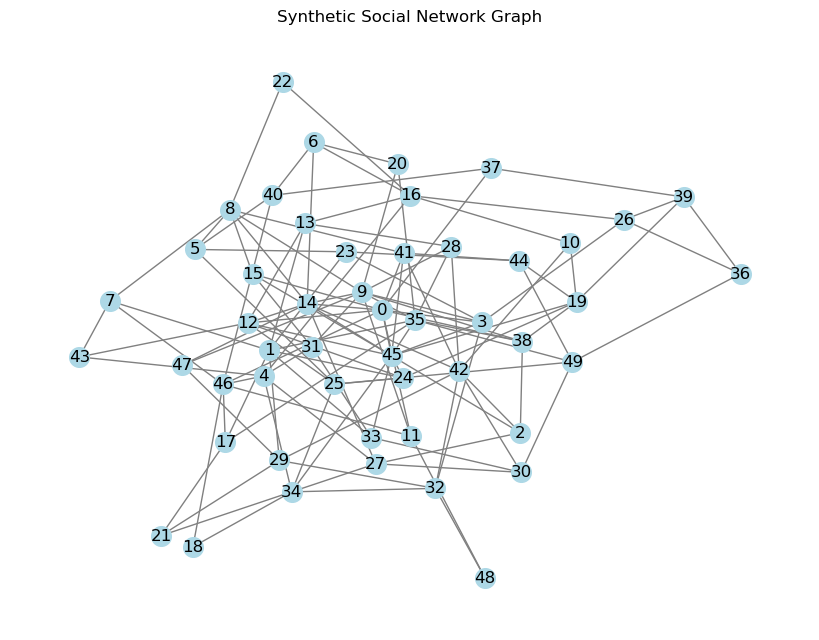

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generate synthetic social network graph
#Set the random seed to ensure reproducibility.
np.random.seed(0) 

# Specify the number of nodes (vertices) in the graph.
num_nodes = 50 

# Define the average degree (number of edges per node) for the graph
avg_degree = 5 

# Calculates the probability of edge creation based on the average degree.
p = avg_degree / (num_nodes - 1) 

# Create a synthetic social network graph using the Erdős-Rényi model. 
# This model generates random graphs with a specified number of nodes and edge probability.
G = nx.erdos_renyi_graph(num_nodes, p)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')
plt.title("Synthetic Social Network Graph")
plt.show()


The resulting plot represents a synthetic social network graph, where nodes (people or entities) are connected by edges (relationships). The light blue nodes represent individuals, and the gray edges indicate connections between them. Keep in mind that this is a randomly generated graph for illustrative purposes, and real-world social networks are much more complex.

Now that we have our synthetic social network graph, let's perform permutation testing to analyze the clustering coefficient of the network. We'll compare the observed clustering coefficient to the distribution of clustering coefficients obtained from randomly permuted networks.

Observed clustering coefficient: 0.10077777777777781


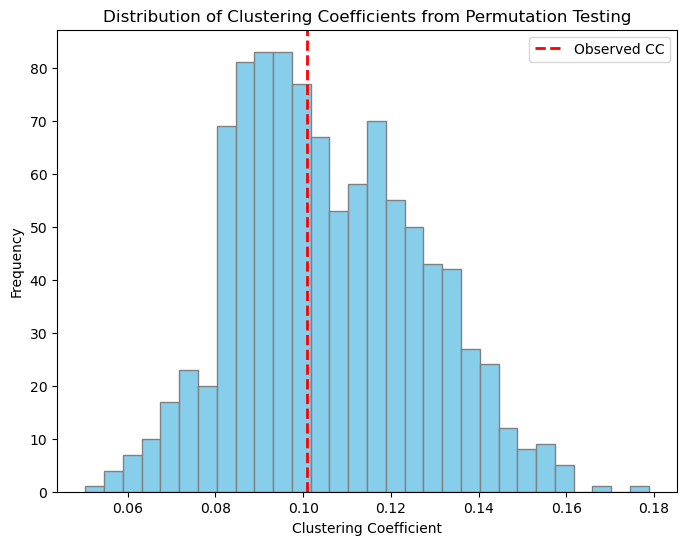

p-value: 0.541


In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Function to calculate clustering coefficient of a graph
def clustering_coefficient(G):
    return nx.average_clustering(G)

# Generate synthetic social network graph
num_nodes = 50 
avg_degree = 5 
p = avg_degree / (num_nodes - 1) 
G = nx.erdos_renyi_graph(num_nodes, p)

# Calculate observed clustering coefficient
observed_cc = clustering_coefficient(G)
print("Observed clustering coefficient:", observed_cc)

# Perform permutation testing
num_permutations = 1000
permutation_ccs = []

for _ in range(num_permutations):
    # Permute the edges of the graph
    permuted_G = nx.double_edge_swap(G, nswap=1, max_tries=1000)
    # Calculate clustering coefficient of permuted graph
    permutation_cc = clustering_coefficient(permuted_G)
    permutation_ccs.append(permutation_cc)

# Plot the distribution of clustering coefficients from permutations
plt.figure(figsize=(8, 6))
plt.hist(permutation_ccs, bins=30, color='skyblue', edgecolor='gray')
plt.axvline(observed_cc, color='red', linestyle='dashed', linewidth=2, label='Observed CC')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Clustering Coefficients from Permutation Testing')
plt.legend()
plt.show()

# Calculate p-value
p_value = np.mean(np.array(permutation_ccs) >= observed_cc)
print("p-value:", p_value)
